GRADIENT BOOSTING

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3   # range [-3, 3]
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

In [4]:
y = y.ravel()

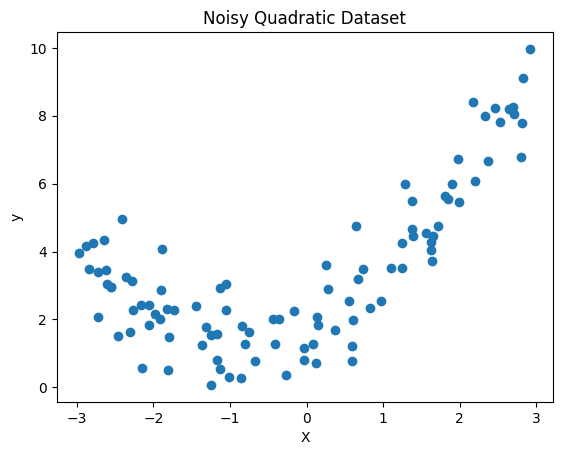

In [5]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Noisy Quadratic Dataset")
plt.show()

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

# Predictions
y_pred1 = tree_reg1.predict(X)

In [11]:
#Compute Residuals
y2 = y - y_pred1

In [12]:
##second tree learns the residuals of previous
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

y_pred2 = tree_reg2.predict(X)

In [13]:
#Residuals
y3 = y2 - y_pred2

In [14]:
##third tree
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)


,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [15]:
##final prediction
X_new = np.linspace(-3, 3, 200).reshape(-1, 1)

y_pred = (
    tree_reg1.predict(X_new) +
    tree_reg2.predict(X_new) +
    tree_reg3.predict(X_new)
)


In [16]:
y_pred

array([3.57339737, 3.57339737, 3.57339737, 3.57339737, 3.57339737,
       3.57339737, 3.57339737, 3.57339737, 3.57339737, 3.57339737,
       3.57339737, 3.57339737, 3.57339737, 3.57339737, 3.57339737,
       3.57339737, 3.57339737, 3.57339737, 3.57339737, 3.57339737,
       3.57339737, 3.57339737, 3.57339737, 2.12959459, 2.12959459,
       2.12959459, 2.12959459, 2.12959459, 2.12959459, 2.12959459,
       2.12959459, 2.12959459, 2.12959459, 2.12959459, 2.12959459,
       2.12959459, 2.12959459, 2.12959459, 2.12959459, 2.12959459,
       1.42923774, 1.42923774, 1.42923774, 1.42923774, 1.42923774,
       1.42923774, 1.42923774, 1.42923774, 1.42923774, 1.42923774,
       1.42923774, 1.42923774, 1.42923774, 1.42923774, 1.42923774,
       1.42923774, 1.42923774, 1.42923774, 1.42923774, 1.42923774,
       1.42923774, 1.42923774, 1.42923774, 1.42923774, 1.42923774,
       1.42923774, 1.42923774, 1.42923774, 1.42923774, 1.42923774,
       1.42923774, 1.42923774, 1.42923774, 1.42923774, 1.42923

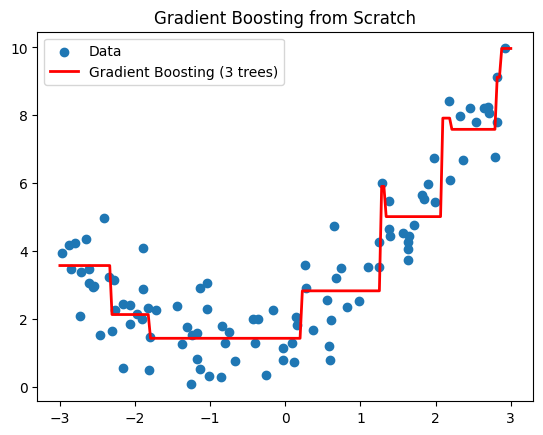

In [17]:
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Gradient Boosting (3 trees)")
plt.legend()
plt.title("Gradient Boosting from Scratch")
plt.show()


In [18]:
## Using GBRT
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)

gbrt.fit(X, y)

y_pred_sklearn = gbrt.predict(X_new)


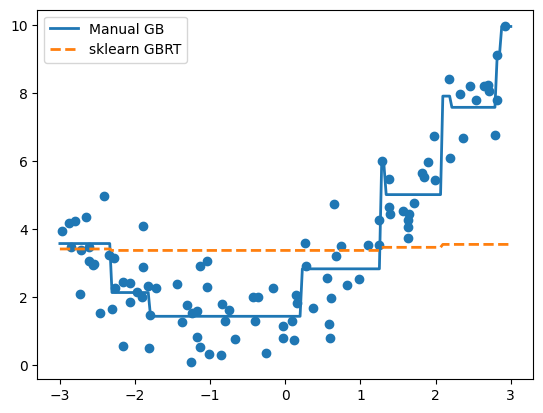

In [21]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, label="Manual GB", linewidth=2)
plt.plot(X_new, y_pred_sklearn, "--", label="sklearn GBRT", linewidth=2)
plt.legend()
plt.show()

In [24]:
## Using GBRT reducing learning rate
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=300,
    learning_rate=0.05
)

gbrt.fit(X, y)

y_pred_sklearn = gbrt.predict(X_new)

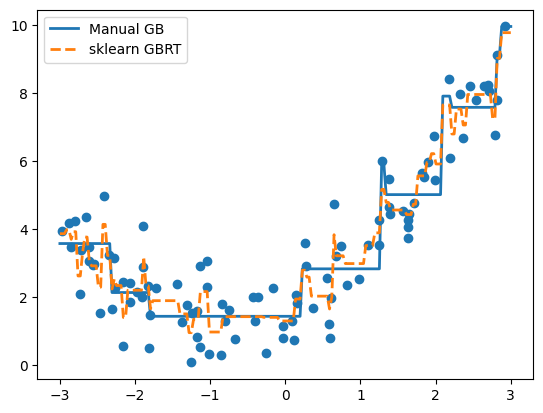

In [25]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, label="Manual GB", linewidth=2)
plt.plot(X_new, y_pred_sklearn, "--", label="sklearn GBRT", linewidth=2)
plt.legend()
plt.show()